In [1]:
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D,Dense, Dropout, Flatten
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [47]:
batch_size = 32 # in each iteration, we consider 32 training xamples at once
num_epochs = 200 # we iterate 200 times over the entire training et
kernel_size = 3 # we will use 3x3 kernels throughout
pool_size = 2 # we will use 2x2 pooling throughout
conv_depth_1 = 32 # we will initially have 32 kernels per conv. layer...
conv_depth_2 = 64 # ...switching to 64 after the first pooling ayer
drop_prob_1 = 0.25 # dropout after pooling with probability 0.25
drop_prob_2 = 0.5 # dropout in the dense layer with probability 0.5
hidden_size = 512 # the dense layer will have 512 neurons

In [48]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #fetch CIFAR-10 data
num_train, depth, height, width = X_train.shape # there are 50000 training examples in CIFAR-10
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_train) # Normalise data to [0, 1] range
Y_train = np_utils.to_categorical(y_train, num_classes) # Onehot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels


In [49]:
history=[]

In [50]:
inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size,padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size,padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size, kernel_size,padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, kernel_size,padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(padding='same',pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)
model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
optimizer='adam', # using the Adam optimiser
metrics=['accuracy']) # reporting the accuracy
history=model.fit(X_train, Y_train,batch_size=batch_size,epochs=num_epochs,verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Epoch 1/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.9164 - accuracy: 0.2803 - val_loss: 1.6894 - val_accuracy: 0.3752
Epoch 2/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6983 - accuracy: 0.3700 - val_loss: 1.6189 - val_accuracy: 0.4066
Epoch 3/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.6226 - accuracy: 0.3994 - val_loss: 1.5058 - val_accuracy: 0.4438
Epoch 4/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.5730 - accuracy: 0.4248 - val_loss: 1.4524 - val_accuracy: 0.4736
Epoch 5/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5368 - accuracy: 0.4376 - val_loss: 1.3950 - val_accuracy: 0.4854
Epoch 6/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5048 - accuracy: 0.4499 - val_loss: 1.3898 - val_accuracy: 0.4946
Epoch 7/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4767 - accuracy: 0.4640 - val_loss: 1.3650 - val_ac

1407/1407 [==============================] - 5s 3ms/step - loss: 1.2341 - accuracy: 0.5609 - val_loss: 1.2234 - val_accuracy: 0.5590
Epoch 58/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2330 - accuracy: 0.5604 - val_loss: 1.2044 - val_accuracy: 0.5706
Epoch 59/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2260 - accuracy: 0.5658 - val_loss: 1.2033 - val_accuracy: 0.5722
Epoch 60/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2288 - accuracy: 0.5633 - val_loss: 1.2061 - val_accuracy: 0.5702
Epoch 61/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2277 - accuracy: 0.5636 - val_loss: 1.2152 - val_accuracy: 0.5710
Epoch 62/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2251 - accuracy: 0.5660 - val_loss: 1.2002 - val_accuracy: 0.5742
Epoch 63/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.2236 - accuracy: 0.5666 - val_loss: 1.2179 - val_accuracy

1407/1407 [==============================] - 5s 3ms/step - loss: 1.1941 - accuracy: 0.5774 - val_loss: 1.1984 - val_accuracy: 0.5788
Epoch 114/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1934 - accuracy: 0.5767 - val_loss: 1.1985 - val_accuracy: 0.5814
Epoch 115/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1924 - accuracy: 0.5780 - val_loss: 1.1959 - val_accuracy: 0.5774
Epoch 116/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1930 - accuracy: 0.5780 - val_loss: 1.1923 - val_accuracy: 0.5788
Epoch 117/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1881 - accuracy: 0.5801 - val_loss: 1.1919 - val_accuracy: 0.5804
Epoch 118/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1906 - accuracy: 0.5780 - val_loss: 1.2250 - val_accuracy: 0.5664
Epoch 119/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1879 - accuracy: 0.5784 - val_loss: 1.1973 - val_ac

Epoch 169/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1721 - accuracy: 0.5855 - val_loss: 1.2126 - val_accuracy: 0.5682
Epoch 170/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1727 - accuracy: 0.5857 - val_loss: 1.2092 - val_accuracy: 0.5642
Epoch 171/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.1757 - accuracy: 0.5836 - val_loss: 1.1986 - val_accuracy: 0.5782
Epoch 172/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1744 - accuracy: 0.5861 - val_loss: 1.1946 - val_accuracy: 0.5804
Epoch 173/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1749 - accuracy: 0.5865 - val_loss: 1.1882 - val_accuracy: 0.5834
Epoch 174/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1742 - accuracy: 0.5875 - val_loss: 1.2034 - val_accuracy: 0.5710
Epoch 175/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.1745 - accuracy: 0.5847 - val_loss: 1

[580.038330078125, 0.16429999470710754]

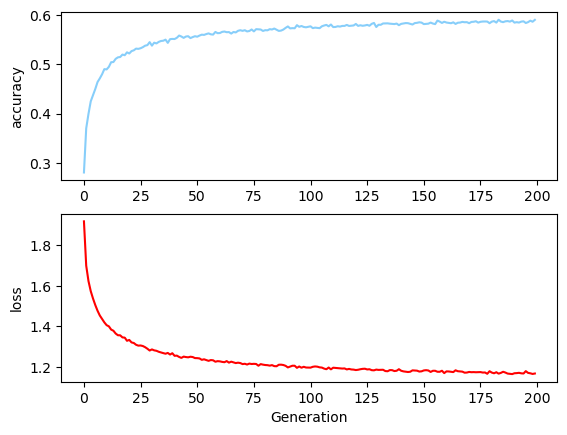

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("loss");
ax[0].plot([i for i in range(len(history.history["accuracy"]))], history.history["accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(history.history["loss"]))], history.history["loss"], color = 'red') 
plt.show()

In [52]:
kernel_size = 5 # we will use 5x5 kernels throughout

In [53]:
history_5х5_krnal=[]

In [54]:
inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size,padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size,padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size, kernel_size,padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, kernel_size,padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(padding='same',pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)
model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
optimizer='adam', # using the Adam optimiser
metrics=['accuracy']) # reporting the accuracy
history_5х5_krnal=model.fit(X_train, Y_train,batch_size=batch_size,epochs=num_epochs,verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Epoch 1/200
1407/1407 [==============================] - 6s 4ms/step - loss: 1.9767 - accuracy: 0.2379 - val_loss: 1.7843 - val_accuracy: 0.3196
Epoch 2/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.7740 - accuracy: 0.3310 - val_loss: 1.6456 - val_accuracy: 0.3768
Epoch 3/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6753 - accuracy: 0.3794 - val_loss: 1.5478 - val_accuracy: 0.4296
Epoch 4/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.6074 - accuracy: 0.4068 - val_loss: 1.4853 - val_accuracy: 0.4542
Epoch 5/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5623 - accuracy: 0.4257 - val_loss: 1.4550 - val_accuracy: 0.4662
Epoch 6/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5319 - accuracy: 0.4378 - val_loss: 1.4039 - val_accuracy: 0.4866
Epoch 7/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5095 - accuracy: 0.4445 - val_loss: 1.3964 - val_ac

1407/1407 [==============================] - 5s 4ms/step - loss: 1.2737 - accuracy: 0.5446 - val_loss: 1.3194 - val_accuracy: 0.5204
Epoch 58/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2697 - accuracy: 0.5432 - val_loss: 1.3069 - val_accuracy: 0.5314
Epoch 59/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2679 - accuracy: 0.5431 - val_loss: 1.3217 - val_accuracy: 0.5308
Epoch 60/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2684 - accuracy: 0.5411 - val_loss: 1.3104 - val_accuracy: 0.5264
Epoch 61/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2675 - accuracy: 0.5453 - val_loss: 1.3105 - val_accuracy: 0.5402
Epoch 62/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2643 - accuracy: 0.5452 - val_loss: 1.3044 - val_accuracy: 0.5376
Epoch 63/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2600 - accuracy: 0.5489 - val_loss: 1.3062 - val_accuracy

1407/1407 [==============================] - 5s 4ms/step - loss: 1.2151 - accuracy: 0.5666 - val_loss: 1.2925 - val_accuracy: 0.5484
Epoch 114/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2104 - accuracy: 0.5709 - val_loss: 1.2975 - val_accuracy: 0.5406
Epoch 115/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2170 - accuracy: 0.5656 - val_loss: 1.3101 - val_accuracy: 0.5342
Epoch 116/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2187 - accuracy: 0.5653 - val_loss: 1.2959 - val_accuracy: 0.5400
Epoch 117/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2097 - accuracy: 0.5662 - val_loss: 1.3014 - val_accuracy: 0.5380
Epoch 118/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2154 - accuracy: 0.5629 - val_loss: 1.3128 - val_accuracy: 0.5412
Epoch 119/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2148 - accuracy: 0.5649 - val_loss: 1.3029 - val_ac

Epoch 169/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1855 - accuracy: 0.5792 - val_loss: 1.3276 - val_accuracy: 0.5216
Epoch 170/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1842 - accuracy: 0.5791 - val_loss: 1.3130 - val_accuracy: 0.5338
Epoch 171/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1868 - accuracy: 0.5776 - val_loss: 1.2997 - val_accuracy: 0.5368
Epoch 172/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1849 - accuracy: 0.5761 - val_loss: 1.3123 - val_accuracy: 0.5350
Epoch 173/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1835 - accuracy: 0.5782 - val_loss: 1.3131 - val_accuracy: 0.5360
Epoch 174/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1831 - accuracy: 0.5786 - val_loss: 1.3171 - val_accuracy: 0.5368
Epoch 175/200
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1901 - accuracy: 0.5744 - val_loss: 1

[1407.0655517578125, 0.3025999963283539]

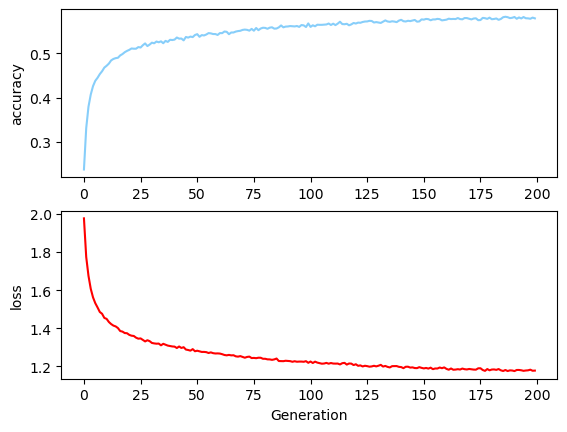

In [55]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("loss");
ax[0].plot([i for i in range(len(history_5х5_krnal.history["accuracy"]))], history_5х5_krnal.history["accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(history_5х5_krnal.history["loss"]))], history_5х5_krnal.history["loss"], color = 'red') 
plt.show()

In [56]:
kernel_size = 2 # we will use 2x2 kernels throughout

In [57]:
history_2х2_krnal=[]

In [58]:
inp = Input(shape=(depth, height, width)) # N.B. depth goes first in Keras
# Conv [32] -> Conv [32] -> Pool (with dropout on the pooling layer)
conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size,padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size,padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)
drop_1 = Dropout(drop_prob_1)(pool_1)
# Conv [64] -> Conv [64] -> Pool (with dropout on the pooling layer)
conv_3 = Convolution2D(conv_depth_2, kernel_size, kernel_size,padding='same', activation='relu')(drop_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, kernel_size,padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(padding='same',pool_size=(pool_size, pool_size))(conv_4)
drop_2 = Dropout(drop_prob_1)(pool_2)
# Now flatten to 1D, apply Dense -> ReLU (with dropout) -> softmax
flat = Flatten()(drop_2)
hidden = Dense(hidden_size, activation='relu')(flat)
drop_3 = Dropout(drop_prob_2)(hidden)
out = Dense(num_classes, activation='softmax')(drop_3)
model = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
optimizer='adam', # using the Adam optimiser
metrics=['accuracy']) # reporting the accuracy
history_2х2_krnal=model.fit(X_train, Y_train,batch_size=batch_size,epochs=num_epochs,verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Epoch 1/200
1407/1407 [==============================] - 8s 5ms/step - loss: 1.7871 - accuracy: 0.3309 - val_loss: 1.5037 - val_accuracy: 0.4462
Epoch 2/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.5445 - accuracy: 0.4316 - val_loss: 1.3578 - val_accuracy: 0.5046
Epoch 3/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4588 - accuracy: 0.4664 - val_loss: 1.3057 - val_accuracy: 0.5258
Epoch 4/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.4032 - accuracy: 0.4888 - val_loss: 1.2568 - val_accuracy: 0.5488
Epoch 5/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3632 - accuracy: 0.5087 - val_loss: 1.2264 - val_accuracy: 0.5550
Epoch 6/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3275 - accuracy: 0.5227 - val_loss: 1.1998 - val_accuracy: 0.5722
Epoch 7/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3053 - accuracy: 0.5313 - val_loss: 1.1765 - val_ac

1407/1407 [==============================] - 7s 5ms/step - loss: 1.0687 - accuracy: 0.6214 - val_loss: 0.9939 - val_accuracy: 0.6582
Epoch 58/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0643 - accuracy: 0.6244 - val_loss: 1.0114 - val_accuracy: 0.6426
Epoch 59/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0628 - accuracy: 0.6235 - val_loss: 0.9962 - val_accuracy: 0.6504
Epoch 60/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0683 - accuracy: 0.6208 - val_loss: 1.0028 - val_accuracy: 0.6558
Epoch 61/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0622 - accuracy: 0.6246 - val_loss: 1.0212 - val_accuracy: 0.6448
Epoch 62/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0613 - accuracy: 0.6221 - val_loss: 1.0242 - val_accuracy: 0.6516
Epoch 63/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0601 - accuracy: 0.6255 - val_loss: 1.0019 - val_accuracy

1407/1407 [==============================] - 7s 5ms/step - loss: 1.0169 - accuracy: 0.6423 - val_loss: 0.9759 - val_accuracy: 0.6576
Epoch 114/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0254 - accuracy: 0.6397 - val_loss: 0.9706 - val_accuracy: 0.6740
Epoch 115/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0221 - accuracy: 0.6415 - val_loss: 0.9892 - val_accuracy: 0.6622
Epoch 116/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0203 - accuracy: 0.6405 - val_loss: 0.9757 - val_accuracy: 0.6652
Epoch 117/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0225 - accuracy: 0.6370 - val_loss: 0.9804 - val_accuracy: 0.6614
Epoch 118/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0270 - accuracy: 0.6381 - val_loss: 0.9835 - val_accuracy: 0.6574
Epoch 119/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0167 - accuracy: 0.6401 - val_loss: 0.9687 - val_ac

Epoch 169/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0006 - accuracy: 0.6480 - val_loss: 0.9722 - val_accuracy: 0.6736
Epoch 170/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0006 - accuracy: 0.6483 - val_loss: 0.9604 - val_accuracy: 0.6714
Epoch 171/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0036 - accuracy: 0.6470 - val_loss: 0.9651 - val_accuracy: 0.6688
Epoch 172/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0066 - accuracy: 0.6466 - val_loss: 0.9693 - val_accuracy: 0.6604
Epoch 173/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0007 - accuracy: 0.6480 - val_loss: 0.9687 - val_accuracy: 0.6584
Epoch 174/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0025 - accuracy: 0.6457 - val_loss: 0.9693 - val_accuracy: 0.6720
Epoch 175/200
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0026 - accuracy: 0.6460 - val_loss: 0

[250.61622619628906, 0.262800008058548]

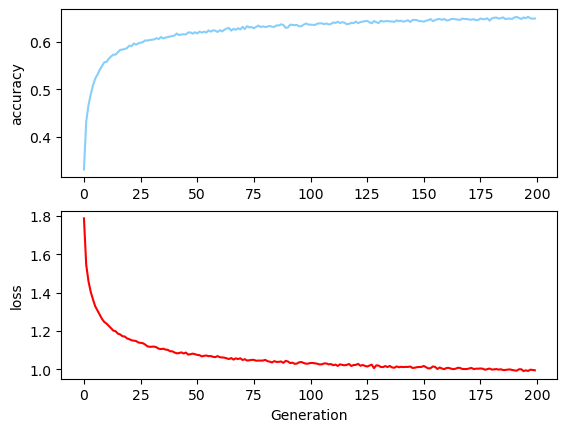

In [59]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].set_ylabel("accuracy");
ax[1].set_xlabel("Generation");
ax[1].set_ylabel("loss");
ax[0].plot([i for i in range(len(history_2х2_krnal.history["accuracy"]))], history_2х2_krnal.history["accuracy"], color = 'lightskyblue')   
ax[1].plot([i for i in range(len(history_2х2_krnal.history["loss"]))], history_2х2_krnal.history["loss"], color = 'red') 
plt.show()

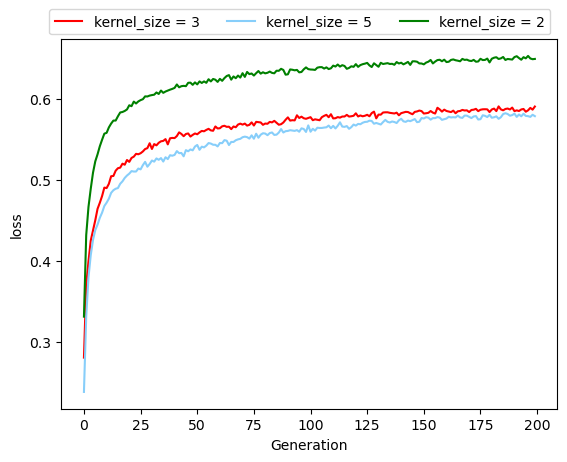

In [60]:
fig, ax = plt.subplots()
ax.set_xlabel("Generation");
ax.set_ylabel("loss");
ax.plot([i for i in range(len(history.history["accuracy"]))], history.history["accuracy"], color = 'red',label ="kernel_size = 3"  ) 
ax.plot([i for i in range(len(history_5х5_krnal.history["accuracy"]))], history_5х5_krnal.history["accuracy"], color = 'lightskyblue',label ="kernel_size = 5")   
ax.plot([i for i in range(len(history_2х2_krnal.history["accuracy"]))], history_2х2_krnal.history["accuracy"], color = 'green',label ="kernel_size = 2")
ax.legend(bbox_to_anchor =(1, 1.1), ncol = 3)

plt.show()

Как мы видим по графику, для параметра точности значение 2 является оптимальный параметр размера ядра свёртки для текущих входных данных и конфигурации нейронной сети. При этом обучение нейросети с размером ядра свертки равным 2 немного дольше, чем обучение нейросети с размером ядра свертки размерностью больше 2 * 2, из чего можно сделать вывод, что уменьшение размерности ядра свертки ускоряет работу нейросети.

In [61]:
kernel_size = 3 # we will use 3x3 kernels throughout

In [62]:
history_3х3_krnal_without_dropout=[]

In [63]:
inp = Input(shape=(depth, height, width))

conv_1 = Convolution2D(conv_depth_1, kernel_size, kernel_size,padding='same', activation='relu')(inp)
conv_2 = Convolution2D(conv_depth_1, kernel_size, kernel_size,padding='same', activation='relu')(conv_1)
pool_1 = MaxPooling2D(pool_size=(pool_size, pool_size))(conv_2)

conv_3 = Convolution2D(conv_depth_2, kernel_size, kernel_size,padding='same', activation='relu')(pool_1)
conv_4 = Convolution2D(conv_depth_2, kernel_size, kernel_size,padding='same', activation='relu')(conv_3)
pool_2 = MaxPooling2D(padding='same',pool_size=(pool_size, pool_size))(conv_4)

flat = Flatten()(pool_2)
hidden = Dense(hidden_size, activation='relu')(flat)
out = Dense(num_classes, activation='softmax')(hidden)
model = Model(inputs=inp, outputs=out) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history_3х3_krnal_without_dropout=model.fit(X_train, Y_train,batch_size=batch_size,epochs=num_epochs,verbose=1, validation_split=0.1) 
model.evaluate(X_test, Y_test, verbose=1) 

Epoch 1/200
1407/1407 [==============================] - 5s 3ms/step - loss: 1.8297 - accuracy: 0.3138 - val_loss: 1.6471 - val_accuracy: 0.3810
Epoch 2/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.5737 - accuracy: 0.4153 - val_loss: 1.4718 - val_accuracy: 0.4508
Epoch 3/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.4747 - accuracy: 0.4521 - val_loss: 1.4536 - val_accuracy: 0.4576
Epoch 4/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3989 - accuracy: 0.4819 - val_loss: 1.3927 - val_accuracy: 0.4852
Epoch 5/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3510 - accuracy: 0.5040 - val_loss: 1.3715 - val_accuracy: 0.4978
Epoch 6/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.3079 - accuracy: 0.5202 - val_loss: 1.3451 - val_accuracy: 0.5042
Epoch 7/200
1407/1407 [==============================] - 4s 3ms/step - loss: 1.2752 - accuracy: 0.5330 - val_loss: 1.2874 - val_ac

1407/1407 [==============================] - 5s 4ms/step - loss: 0.7153 - accuracy: 0.7345 - val_loss: 1.5866 - val_accuracy: 0.5332
Epoch 58/200
1407/1407 [==============================] - 5s 4ms/step - loss: 0.7023 - accuracy: 0.7369 - val_loss: 1.6895 - val_accuracy: 0.5414
Epoch 59/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6955 - accuracy: 0.7409 - val_loss: 1.7791 - val_accuracy: 0.5230
Epoch 60/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6859 - accuracy: 0.7424 - val_loss: 1.7565 - val_accuracy: 0.5228
Epoch 61/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6862 - accuracy: 0.7433 - val_loss: 1.7036 - val_accuracy: 0.5402
Epoch 62/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6816 - accuracy: 0.7420 - val_loss: 1.7536 - val_accuracy: 0.5350
Epoch 63/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.6696 - accuracy: 0.7492 - val_loss: 1.7702 - val_accuracy

1407/1407 [==============================] - 5s 3ms/step - loss: 0.4882 - accuracy: 0.8173 - val_loss: 2.7862 - val_accuracy: 0.5184
Epoch 114/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4834 - accuracy: 0.8190 - val_loss: 2.7020 - val_accuracy: 0.5232
Epoch 115/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4925 - accuracy: 0.8155 - val_loss: 2.6980 - val_accuracy: 0.5152
Epoch 116/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4826 - accuracy: 0.8183 - val_loss: 2.7537 - val_accuracy: 0.5220
Epoch 117/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4873 - accuracy: 0.8187 - val_loss: 2.6295 - val_accuracy: 0.5236
Epoch 118/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4736 - accuracy: 0.8214 - val_loss: 2.7937 - val_accuracy: 0.5160
Epoch 119/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4755 - accuracy: 0.8231 - val_loss: 2.8825 - val_ac

Epoch 169/200
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4108 - accuracy: 0.8491 - val_loss: 3.5071 - val_accuracy: 0.5062
Epoch 170/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4022 - accuracy: 0.8528 - val_loss: 3.4463 - val_accuracy: 0.5012
Epoch 171/200
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4062 - accuracy: 0.8490 - val_loss: 3.4649 - val_accuracy: 0.5050
Epoch 172/200
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4089 - accuracy: 0.8493 - val_loss: 3.5717 - val_accuracy: 0.5068
Epoch 173/200
1407/1407 [==============================] - 5s 4ms/step - loss: 0.4007 - accuracy: 0.8538 - val_loss: 3.5704 - val_accuracy: 0.5028
Epoch 174/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4111 - accuracy: 0.8491 - val_loss: 3.5545 - val_accuracy: 0.5034
Epoch 175/200
1407/1407 [==============================] - 5s 3ms/step - loss: 0.4001 - accuracy: 0.8542 - val_loss: 3

[2344.41845703125, 0.2671999931335449]

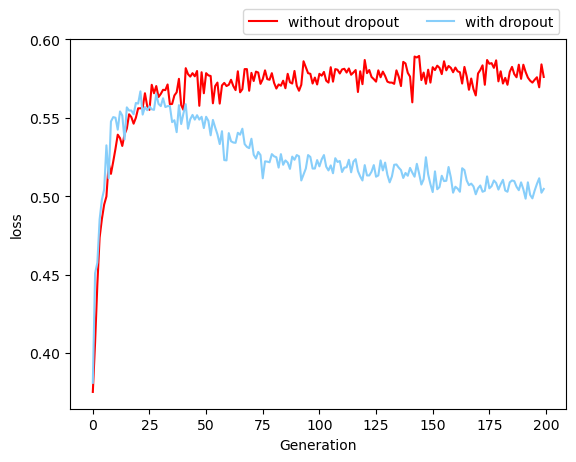

In [69]:
fig, ax = plt.subplots()
ax.set_xlabel("Generation");
ax.set_ylabel("loss");
ax.plot([i for i in range(len(history.history["val_accuracy"]))], history.history["val_accuracy"], color = 'red',label ="without dropout"  ) 
ax.plot([i for i in range(len(history_3х3_krnal_without_dropout.history["val_accuracy"]))], history_3х3_krnal_without_dropout.history["val_accuracy"], color = 'lightskyblue',label ="with dropout")   
ax.legend(bbox_to_anchor =(1, 1.1), ncol = 2)

plt.show()

Как мы видим по графикам для данной нейросети применение слоя dropot повысило точность, из чего можно сделать вывод, что применение данного алгоритма к слоям помогает избежать переобучения.